<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-20 09:14:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  63.9MB/s    in 3.2s    

2025-04-20 09:14:28 (64.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


Missing values in CompTotal column :  31697
FIlling missing values with the mean value :  2.9638411381149976e+145
Missing values in CompTotal column aftre imputation:  0
Unique values :  [2.96384114e+155 2.04000000e+016 2.80000000e+014 ... 2.54600000e+015
 2.47433000e+015 7.77000000e+014]


/tmp/ipykernel_2041/3810936200.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompTotal'].fillna(df['CompTotal'].mean(), inplace=True)


(array([6.5436e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.e+000, 1.e+160, 2.e+160, 3.e+160, 4.e+160, 5.e+160, 6.e+160,
        7.e+160, 8.e+160, 9.e+160, 1.e+161]),
 <BarContainer object of 10 artists>)

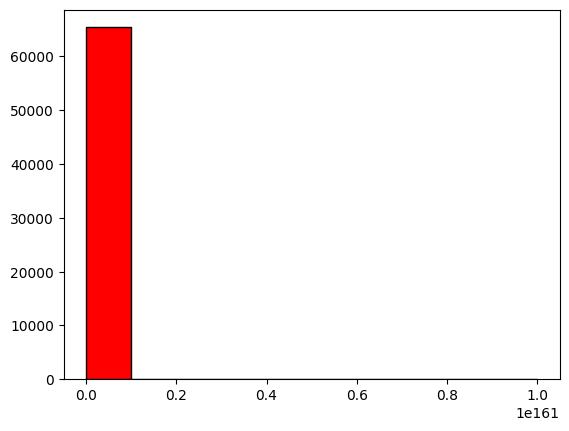

In [9]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

print("Missing values in CompTotal column : ", df['CompTotal'].isnull().sum())
print("FIlling missing values with the mean value : ",df['CompTotal'].mean() )
df['CompTotal'].fillna(df['CompTotal'].mean(), inplace=True)
print("Missing values in CompTotal column aftre imputation: ", df['CompTotal'].isnull().sum())
print("Unique values : ", (df['CompTotal']*10000000000).unique())
plt.hist(df['CompTotal']*100000000000, edgecolor = 'black', facecolor = 'red')

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


Misising values in YearsCodePro column is :  13827
Misising values in YearsCodePro column is after removbing the rows:  0


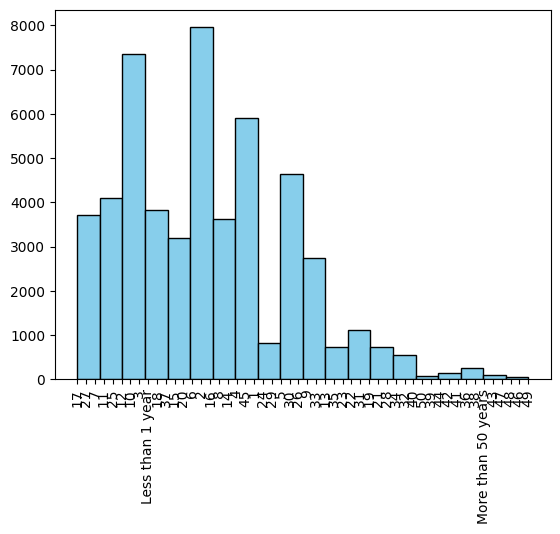

In [10]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
#check missing values in YearsCodePro column
print("Misising values in YearsCodePro column is : ", df['YearsCodePro'].isnull().sum())
#Drop mising values
df = df.dropna(axis=0, subset=['YearsCodePro'])
print("Misising values in YearsCodePro column is after removbing the rows: ", df['YearsCodePro'].isnull().sum())
plt.hist(df['YearsCodePro'], bins=20,  edgecolor = 'black', facecolor = 'skyblue')
plt.xticks(rotation=90)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [11]:
!pip install seaborn

Missing values in CompTotal column :  31697
FIlling missing values with the mean value :  2.9638411381149976e+145


/tmp/ipykernel_2041/2264487734.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompTotal'].fillna(df['CompTotal'].mean(), inplace=True)


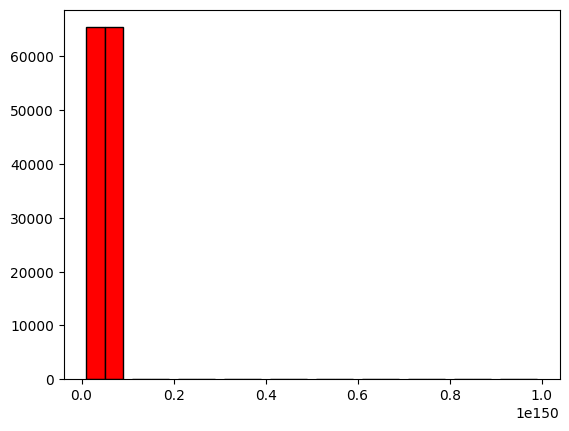

In [12]:
## Write your code here
import seaborn as sns
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

age_map = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}
df['AgeBins'] = df['Age'].map(age_map)

print("Missing values in CompTotal column : ", df['CompTotal'].isnull().sum())
print("FIlling missing values with the mean value : ",df['CompTotal'].mean() )
df['CompTotal'].fillna(df['CompTotal'].mean(), inplace=True)

plt.hist(df[['CompTotal','AgeBins']], edgecolor = 'black', facecolor = 'red')
#sns.histplot(data=df[['CompTotal'],['Age']], x='CompTotal', hue='Age', palette=['yellow', 'green'])
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [13]:
## Write your code here
def time_to_minutes(time_str):
    if 'minute' in str(time_str):
        if 'Less than 15' in str(time_str):
            return 7.5  # Assuming less than 15 minutes is approximately 7.5 minutes
        elif '15-30' in str(time_str):
            return 22.5
        elif '30-60' in str(time_str):
            return 45
        elif '60+' in str(time_str):
            return 60
    return None  # If time_str is not recognized, return None

age_map = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

df['AgeBins'] = df['Age'].map(age_map)

#print(df['AgeBins'])
# Filter the data for the age group 30 to 35 (i.e., 25-34 years old)
df_new = df

df_new.loc[:, 'TimeSearching'] = df_new['TimeSearching'].apply(time_to_minutes)


# Calculate the median of TimeSearching and TimeAnswering for this group
NewDf_WIth_Median = df_new['TimeSearching'].median()
#NewDf_WIth_Median = NewDf_WIth_Median.astype(int)

NewDf_WIth_Median.hist(column='TimeSearching')

AttributeError: 'numpy.float64' object has no attribute 'hist'

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


Missing values in DatabaseWantToWorkWith column :  22879
   ResponseId                      MainBranch              Age  \
1           2  I am a developer by profession  35-44 years old   
2           3  I am a developer by profession  45-54 years old   

            Employment RemoteWork   Check  \
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   

                                    CodingActivities  \
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   

                                           EdLevel  \
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                           LearnCode  \
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
1  Technical documentation;Blog

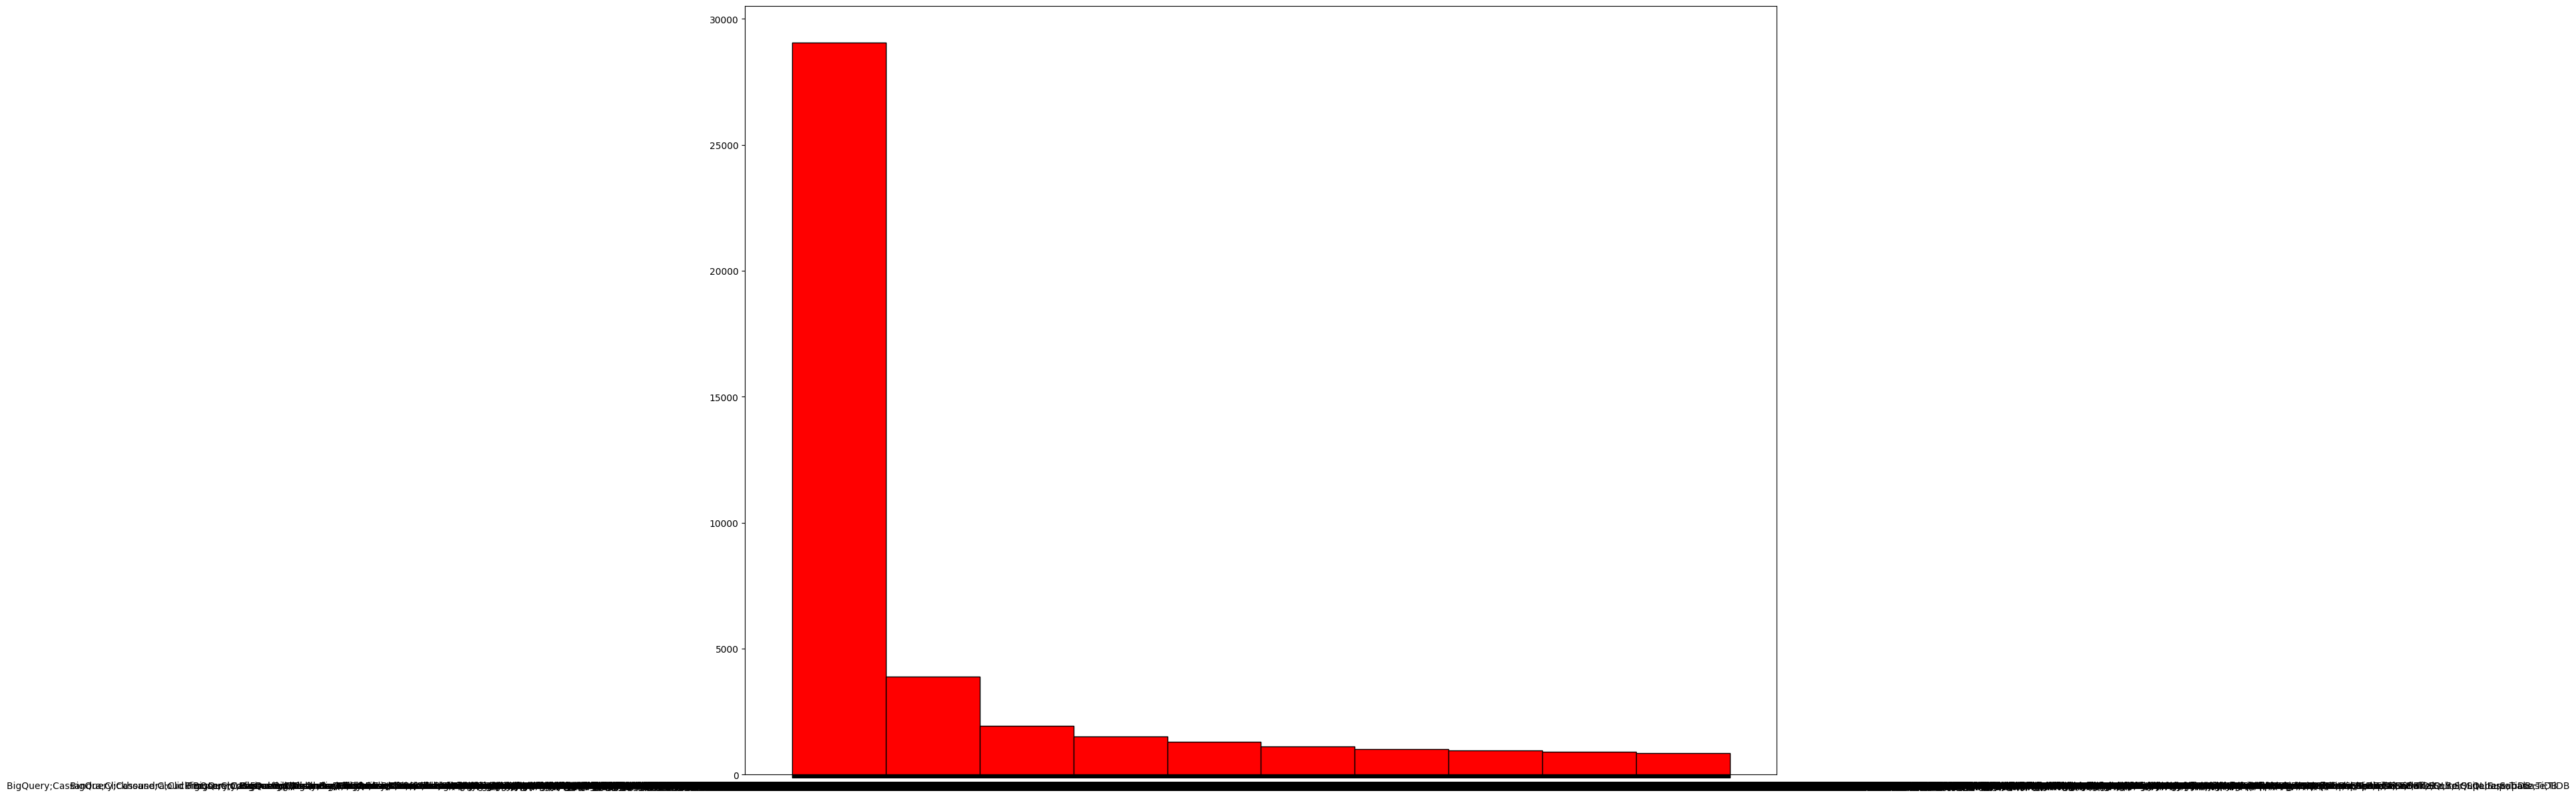

In [17]:
## Write your code here
import seaborn as sns
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

print("Missing values in DatabaseWantToWorkWith column : ",  df['DatabaseWantToWorkWith'].isnull().sum())
df_cleaned = df.dropna(subset=['DatabaseWantToWorkWith'])
print(df_cleaned.head(2))

plt.figure(figsize=(20,15))
plt.hist(df_cleaned['DatabaseWantToWorkWith'], edgecolor = 'black', facecolor = 'red')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


Missing values in RemoteWork column :  10631


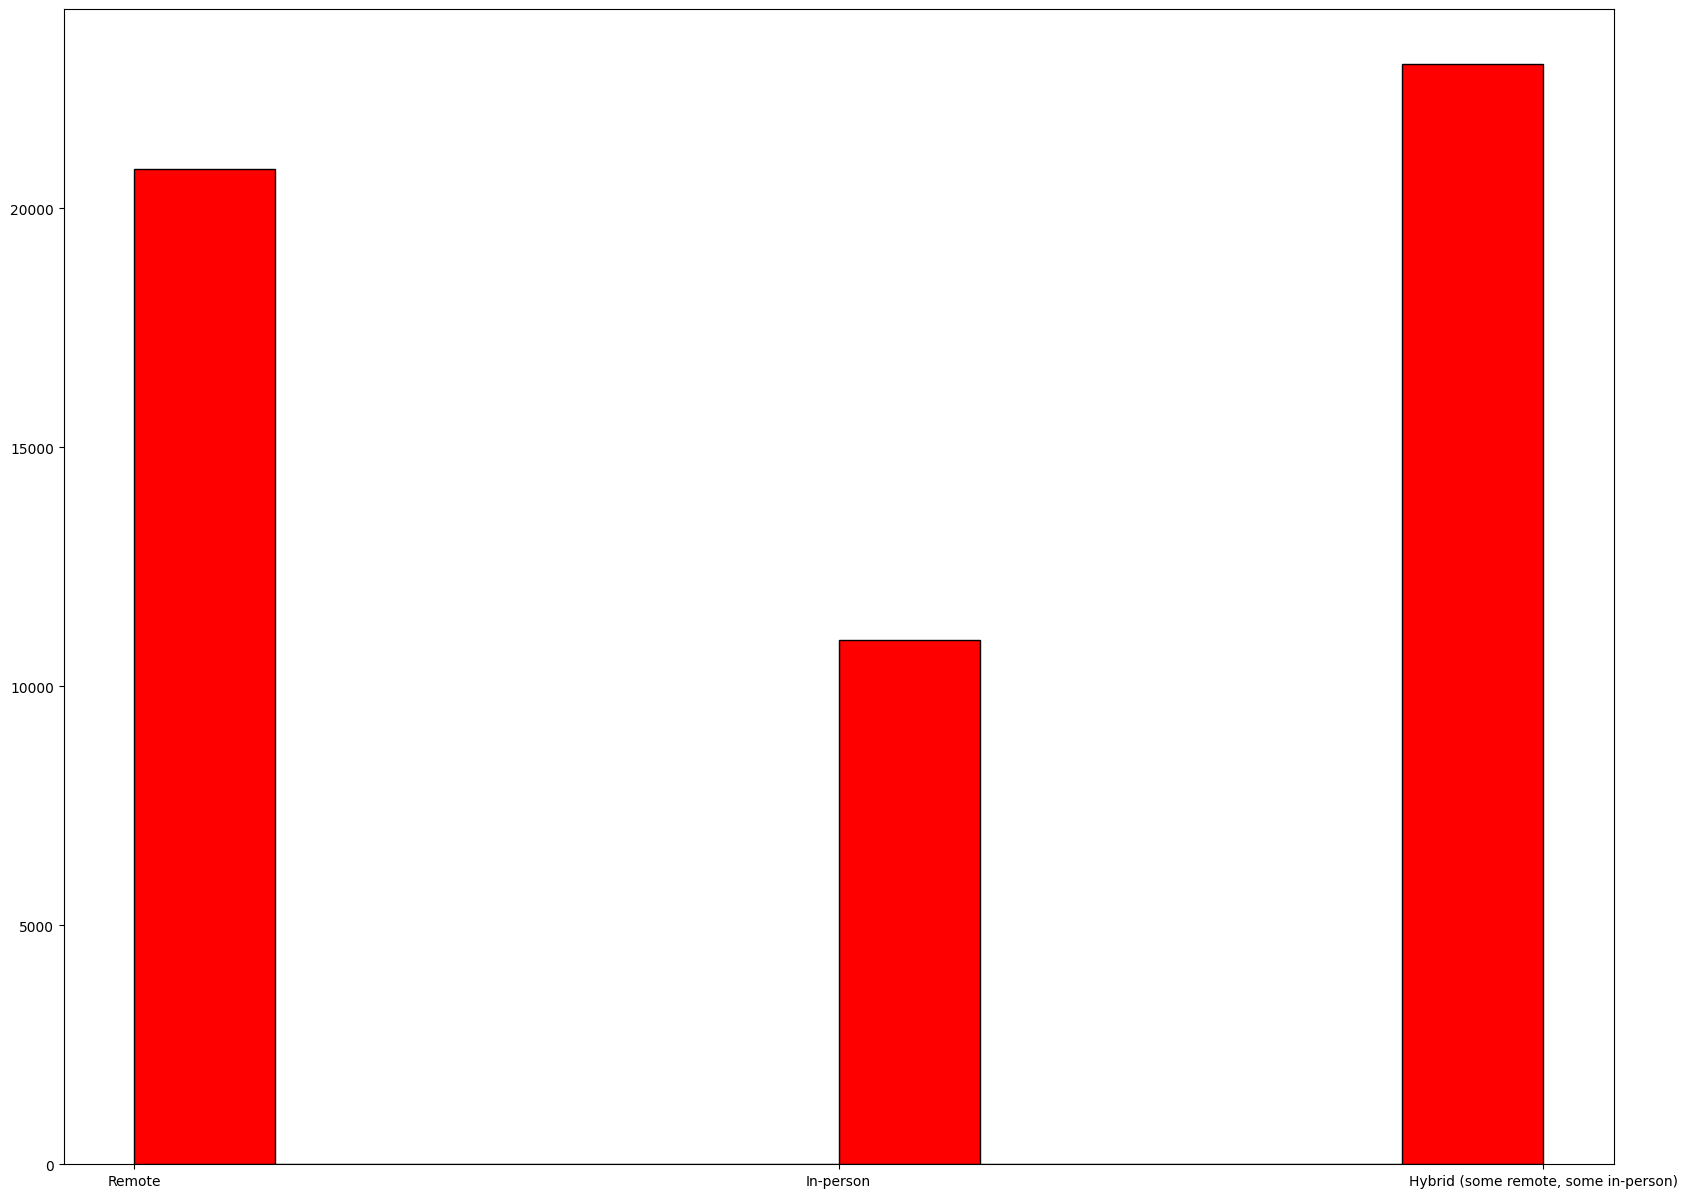

In [18]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)


print("Missing values in RemoteWork column : ",  df['RemoteWork'].isnull().sum())
df_cleanedRW = df.dropna(subset=['RemoteWork'])
#print(df_cleanedRW.head(2))

plt.figure(figsize=(20,15))
plt.hist(df_cleanedRW['RemoteWork'], edgecolor = 'black', facecolor = 'red')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


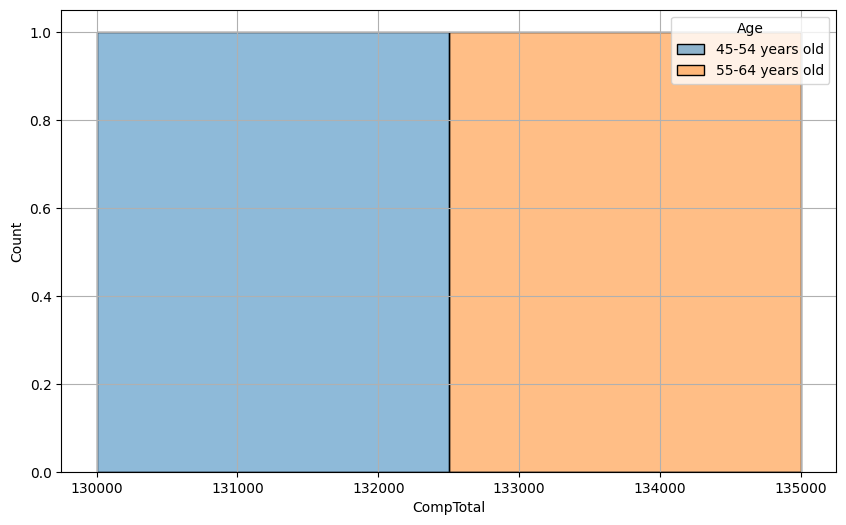

In [24]:
## Write your code here
# Filter the data for the age range 45 to 60 (i.e., 45-54 and 55-64)
age_map = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}
df['AgeBins'] = df['Age'].map(age_map)
DF_45_60 = df[df['AgeBins'].isin([4, 5])]

# Calculate the median CompTotal for each age group
CompTot_Median = DF_45_60.groupby('Age')['CompTotal'].median().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))

sns.histplot(data=CompTot_Median, x='CompTotal', hue='Age')

#plt.hist(CompTot_Median['CompTotal'], edgecolor = 'black', facecolor = 'red')

# Display the plot
plt.grid(True)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


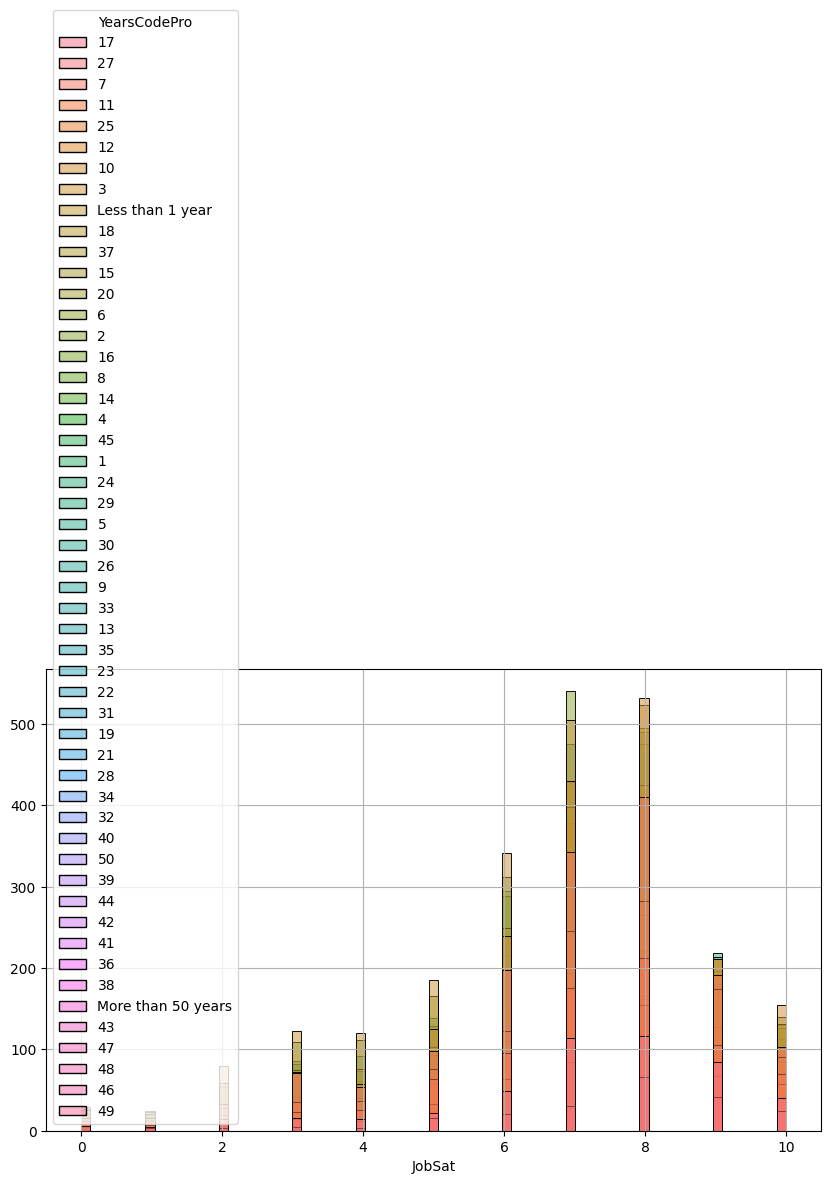

In [27]:
## Write your code here
# Create a line chart
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='JobSat', hue='YearsCodePro')

#plt.hist(CompTot_Median['CompTotal'], edgecolor = 'black', facecolor = 'red')

# Display the plot
plt.grid(True)
plt.ylabel("")
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
